In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Load the original image
image_path = "task_3_image_2.png"

In [29]:
def full_remove_black_borders(image):
    """
    Fully removes black borders around the Petri dish image, ensuring no black edges remain.

    Args:
        image (numpy array): Input raw image.

    Returns:
        cropped_image (numpy array): Cropped image without black borders.
    """
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to separate black regions
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours of the thresholded image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Select the largest contour assuming it contains the Petri dish
    if not contours:
        raise ValueError("No contours found.")
    
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Get bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Crop the image using the bounding rectangle
    cropped_image = image[y:y + h, x:x + w]
    
    return cropped_image

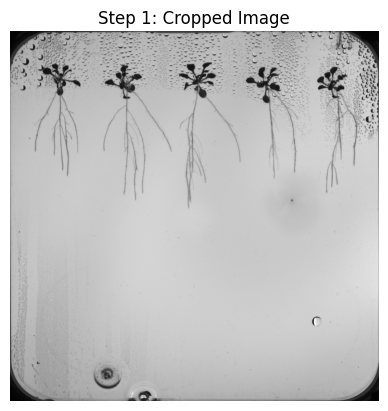

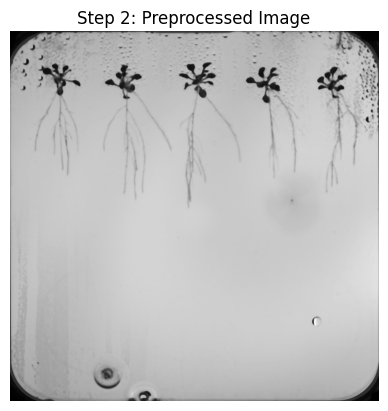

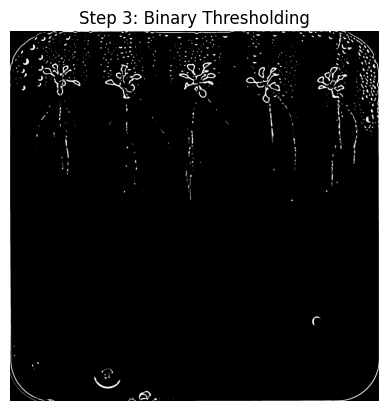

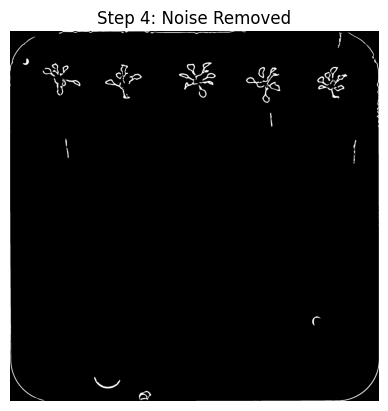

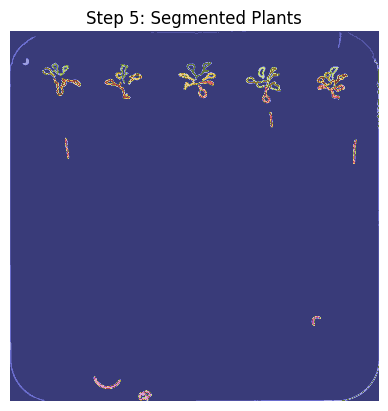

In [30]:
# Step 1: Load and crop the image
def load_and_crop_image(image_path):
    image = cv2.imread(image_path)
    cropped_image = full_remove_black_borders(image)
    plt.figure()
    plt.title("Step 1: Cropped Image")
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    return cropped_image

# Step 2: Preprocess the image (grayscale and blur)
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(gray, 15)
    plt.figure()
    plt.title("Step 2: Preprocessed Image")
    plt.imshow(blurred, cmap='gray')
    plt.axis("off")
    plt.show()
    return blurred

# Step 3: Apply binary thresholding
def apply_threshold(image):
    block_size = 31
    C = 10
    binary = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, block_size, C)
    plt.figure()
    plt.title("Step 3: Binary Thresholding")
    plt.imshow(binary, cmap='gray')
    plt.axis("off")
    plt.show()
    return binary

# Step 4: Remove small noise
def remove_small_objects(binary_image, min_size):
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image)
    output = np.zeros_like(binary_image)
    for i in range(1, num_labels):  # Skip background
        if stats[i, cv2.CC_STAT_AREA] >= min_size:
            output[labels == i] = 255
    plt.figure()
    plt.title("Step 4: Noise Removed")
    plt.imshow(output, cmap='gray')
    plt.axis("off")
    plt.show()
    return output

# Step 5: Segment individual plants
def segment_plants(binary_image):
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(binary_image, kernel, iterations=2)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilated)
    plt.figure()
    plt.title("Step 5: Segmented Plants")
    plt.imshow(labels, cmap="tab20b")
    plt.axis("off")
    plt.show()
    return labels, num_labels

# Main script
if __name__ == "__main__":
    # Step 1: Load and crop the image
    cropped_image = load_and_crop_image(image_path)

    # Step 2: Preprocess the image
    preprocessed_image = preprocess_image(cropped_image)

    # Step 3: Apply thresholding
    binary_image = apply_threshold(preprocessed_image)

    # Step 4: Remove small noise
    filtered_image = remove_small_objects(binary_image, min_size=800)

    # Step 5: Segment individual plants
    labels, num_labels = segment_plants(filtered_image)

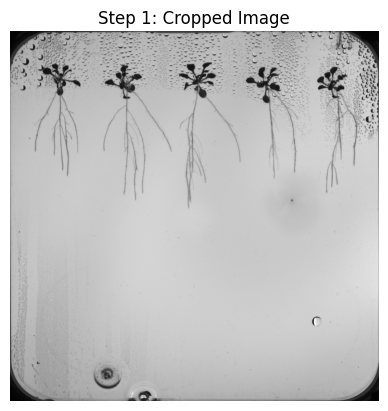

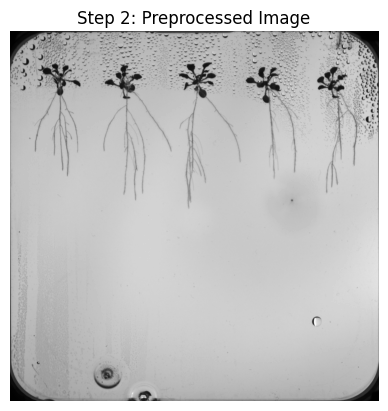

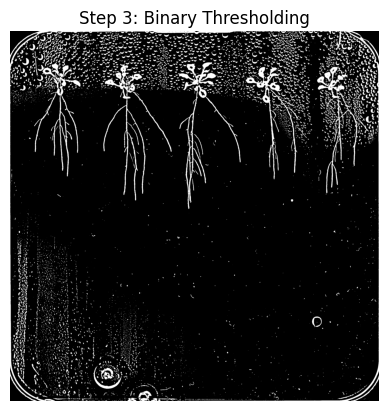

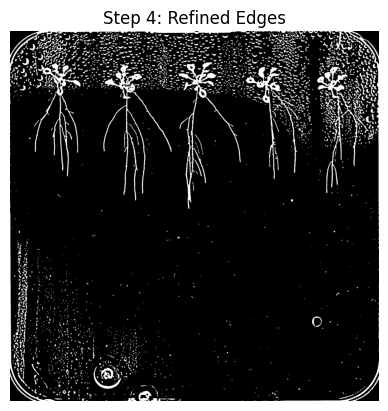

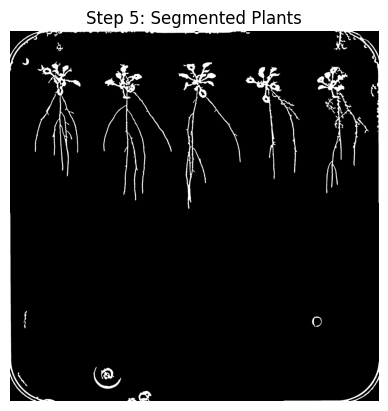

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "task_3_image_2.png"  # Replace with your image path

def full_remove_black_borders(image):
    """
    Fully removes black borders around the Petri dish image, ensuring no black edges remain.

    Args:
        image (numpy array): Input raw image.

    Returns:
        cropped_image (numpy array): Cropped image without black borders.
    """
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to separate black regions
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours of the thresholded image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Select the largest contour assuming it contains the Petri dish
    if not contours:
        raise ValueError("No contours found.")
    
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Get bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Crop the image using the bounding rectangle
    cropped_image = image[y:y + h, x:x + w]
    
    return cropped_image

# Step 1: Load and crop the image
def load_and_crop_image(image_path):
    image = cv2.imread(image_path)
    cropped_image = full_remove_black_borders(image)
    plt.figure()
    plt.title("Step 1: Cropped Image")
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    return cropped_image

# Step 2: Preprocess the image (grayscale and blur)
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    plt.figure()
    plt.title("Step 2: Preprocessed Image")
    plt.imshow(blurred, cmap='gray')
    plt.axis("off")
    plt.show()
    return blurred

# Step 3: Apply binary thresholding
def apply_threshold(image):
    block_size = 51
    C = 5
    binary = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, block_size, C)
    plt.figure()
    plt.title("Step 3: Binary Thresholding")
    plt.imshow(binary, cmap='gray')
    plt.axis("off")
    plt.show()
    return binary

# Step 4: Refine edges and remove noise
def refine_edges(binary_image):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    cleaned = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=3)
    cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_OPEN, kernel, iterations=2)
    plt.figure()
    plt.title("Step 4: Refined Edges")
    plt.imshow(cleaned, cmap='gray')
    plt.axis("off")
    plt.show()
    return cleaned

# Step 5: Segment individual plants
def segment_plants(binary_image):
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
    output = np.zeros_like(labels, dtype=np.uint8)

    for i in range(1, num_labels):  # Skip background
        x, y, w, h, area = stats[i]
        if area > 1000:  # Filter small noise
            output[labels == i] = 255

    plt.figure()
    plt.title("Step 5: Segmented Plants")
    plt.imshow(output, cmap="gray")
    plt.axis("off")
    plt.show()
    return output

# Main script
if __name__ == "__main__":
    # Step 1: Load and crop the image
    cropped_image = load_and_crop_image(image_path)

    # Step 2: Preprocess the image
    preprocessed_image = preprocess_image(cropped_image)

    # Step 3: Apply thresholding
    binary_image = apply_threshold(preprocessed_image)

    # Step 4: Refine edges and remove noise
    refined_image = refine_edges(binary_image)

    # Step 5: Segment individual plants
    segmented_plants = segment_plants(refined_image)


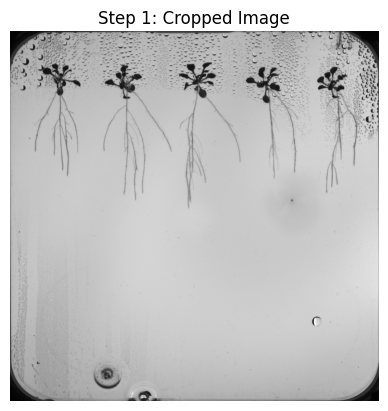

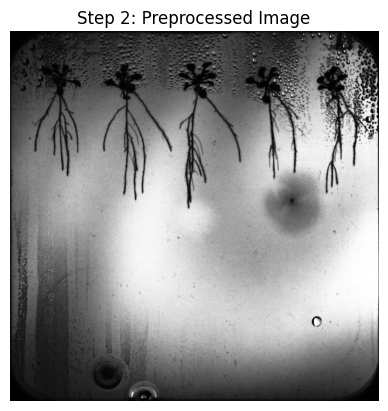

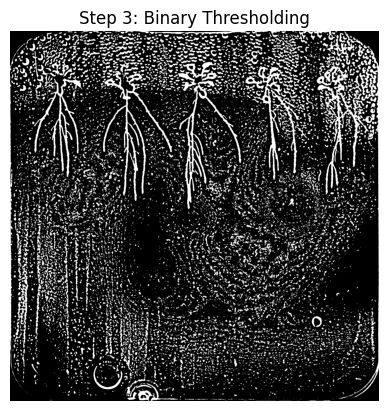

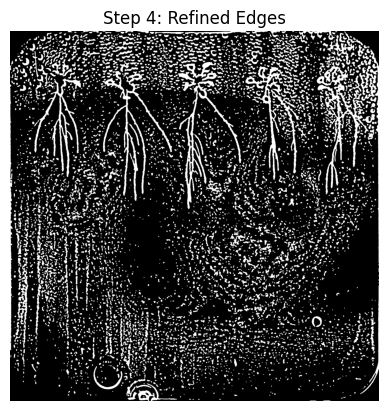

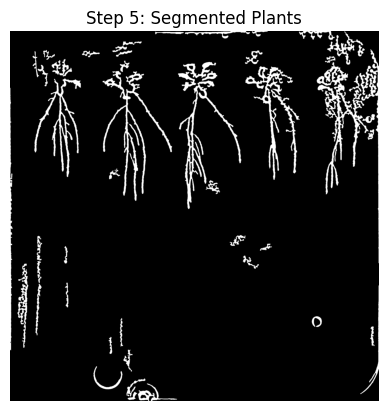

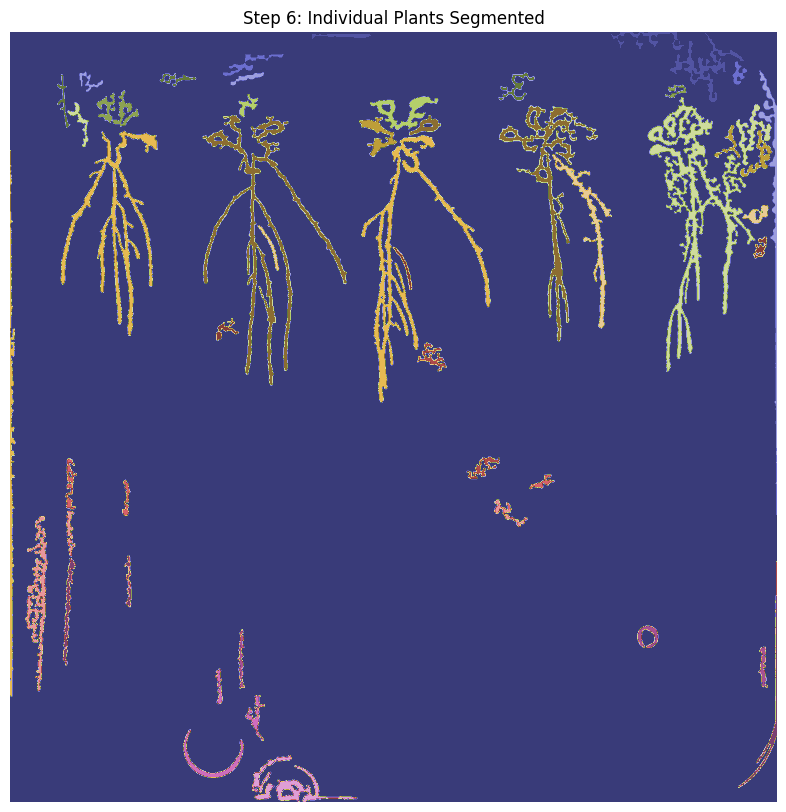

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "task_3_image_2.png"  # Replace with your image path

def full_remove_black_borders(image):
    """
    Fully removes black borders around the Petri dish image, ensuring no black edges remain.

    Args:
        image (numpy array): Input raw image.

    Returns:
        cropped_image (numpy array): Cropped image without black borders.
    """
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to separate black regions
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours of the thresholded image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Select the largest contour assuming it contains the Petri dish
    if not contours:
        raise ValueError("No contours found.")
    
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Get bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Crop the image using the bounding rectangle
    cropped_image = image[y:y + h, x:x + w]
    
    return cropped_image

# Step 1: Load and crop the image
def load_and_crop_image(image_path):
    image = cv2.imread(image_path)
    cropped_image = full_remove_black_borders(image)
    plt.figure()
    plt.title("Step 1: Cropped Image")
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    return cropped_image

# Step 2: Preprocess the image (grayscale and histogram equalization)
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equalized = cv2.equalizeHist(gray)
    blurred = cv2.medianBlur(equalized, 9)
    plt.figure()
    plt.title("Step 2: Preprocessed Image")
    plt.imshow(blurred, cmap='gray')
    plt.axis("off")
    plt.show()
    return blurred

# Step 3: Apply binary thresholding
def apply_threshold(image):
    block_size = 35
    C = 5
    binary = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, block_size, C)
    plt.figure()
    plt.title("Step 3: Binary Thresholding")
    plt.imshow(binary, cmap='gray')
    plt.axis("off")
    plt.show()
    return binary

# Step 4: Refine edges and remove noise
def refine_edges(binary_image):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    cleaned = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel, iterations=2)
    cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_OPEN, kernel, iterations=2)
    plt.figure()
    plt.title("Step 4: Refined Edges")
    plt.imshow(cleaned, cmap='gray')
    plt.axis("off")
    plt.show()
    return cleaned

# Step 5: Separate and segment individual plants
def segment_plants(refined_image):
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(refined_image, connectivity=8)
    plant_mask = np.zeros_like(refined_image, dtype=np.uint8)

    for i in range(1, num_labels):  # Skip background
        x, y, w, h, area = stats[i]
        if area > 1500:  # Filter small noise
            plant_mask[labels == i] = 255

    plt.figure()
    plt.title("Step 5: Segmented Plants")
    plt.imshow(plant_mask, cmap="gray")
    plt.axis("off")
    plt.show()
    return plant_mask

# Step 6: Visualize connected components
def visualize_segments(plant_mask):
    num_labels, labels = cv2.connectedComponents(plant_mask)
    plt.figure(figsize=(10, 10))
    plt.title("Step 6: Individual Plants Segmented")
    plt.imshow(labels, cmap="tab20b")
    plt.axis("off")
    plt.show()

# Main script
if __name__ == "__main__":
    # Step 1: Load and crop the image
    cropped_image = load_and_crop_image(image_path)

    # Step 2: Preprocess the image
    preprocessed_image = preprocess_image(cropped_image)

    # Step 3: Apply thresholding
    binary_image = apply_threshold(preprocessed_image)

    # Step 4: Refine edges and remove noise
    refined_image = refine_edges(binary_image)

    # Step 5: Segment individual plants
    plant_mask = segment_plants(refined_image)

    # Step 6: Visualize individual plant segments
    visualize_segments(plant_mask)

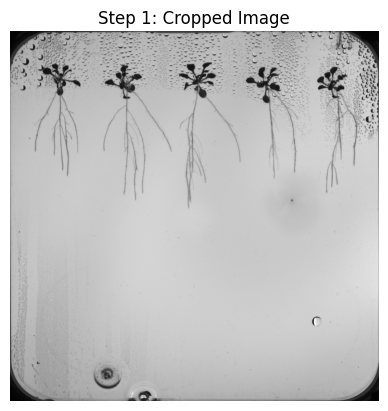

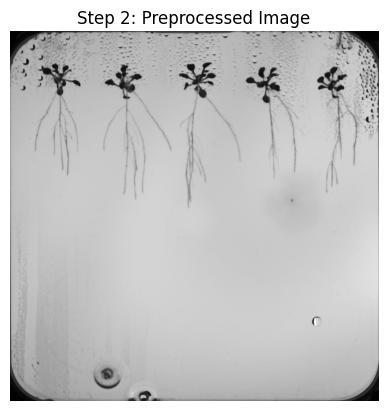

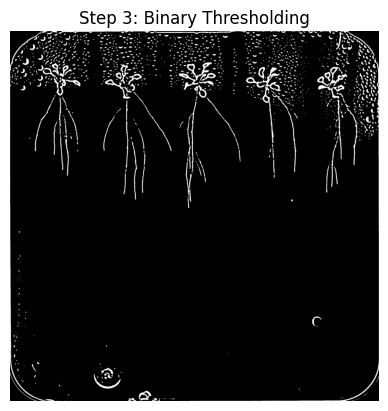

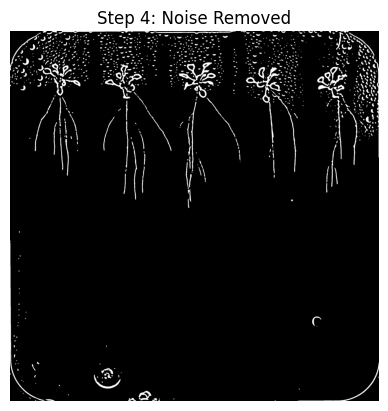

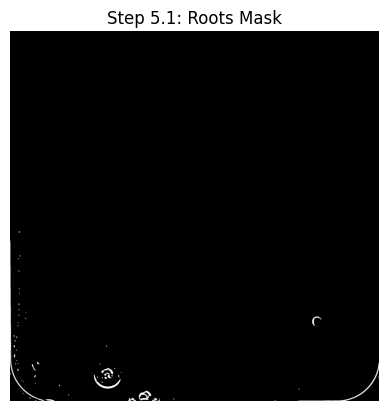

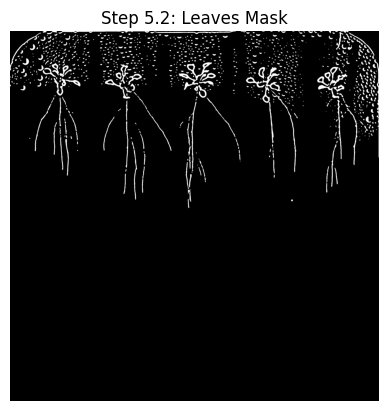

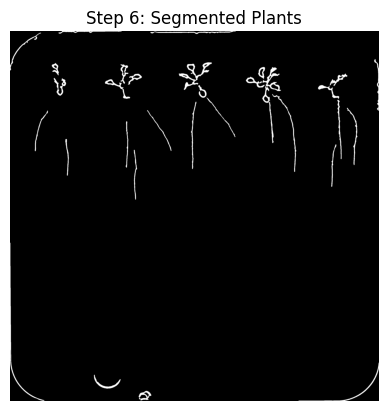

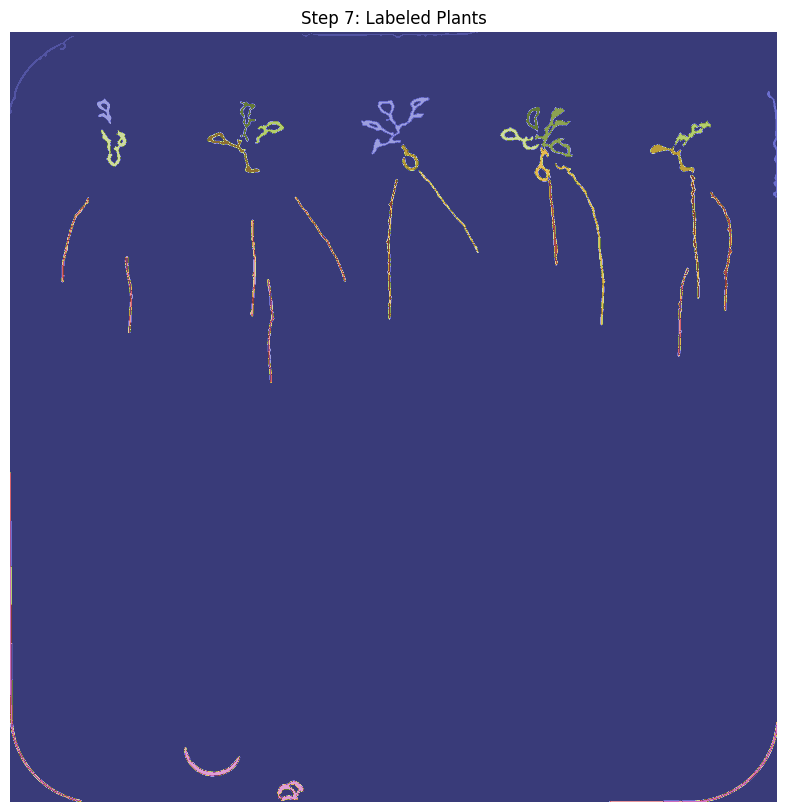

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "task_3_image_2.png"  # Replace with your image path

def full_remove_black_borders(image):
    """
    Fully removes black borders around the Petri dish image, ensuring no black edges remain.

    Args:
        image (numpy array): Input raw image.

    Returns:
        cropped_image (numpy array): Cropped image without black borders.
    """
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to separate black regions
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours of the thresholded image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Select the largest contour assuming it contains the Petri dish
    if not contours:
        raise ValueError("No contours found.")
    
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Get bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Crop the image using the bounding rectangle
    cropped_image = image[y:y + h, x:x + w]
    
    return cropped_image

# Step 1: Load and crop the image
def load_and_crop_image(image_path):
    image = cv2.imread(image_path)
    cropped_image = full_remove_black_borders(image)
    plt.figure()
    plt.title("Step 1: Cropped Image")
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    return cropped_image

# Step 2: Preprocess the image (grayscale and blur)
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(gray, 11)
    plt.figure()
    plt.title("Step 2: Preprocessed Image")
    plt.imshow(blurred, cmap='gray')
    plt.axis("off")
    plt.show()
    return blurred

# Step 3: Apply binary thresholding
def apply_threshold(image):
    block_size = 41
    C = 10
    binary = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, block_size, C)
    plt.figure()
    plt.title("Step 3: Binary Thresholding")
    plt.imshow(binary, cmap='gray')
    plt.axis("off")
    plt.show()
    return binary

# Step 4: Remove small noise
def remove_noise(binary_image):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    opened = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)
    plt.figure()
    plt.title("Step 4: Noise Removed")
    plt.imshow(opened, cmap='gray')
    plt.axis("off")
    plt.show()
    return opened

# Step 5: Separate roots and leaves
def separate_roots_leaves(binary_image):
    h, w = binary_image.shape
    root_mask = np.zeros_like(binary_image)
    leaf_mask = np.zeros_like(binary_image)

    # Split the image into top (leaves) and bottom (roots) regions
    root_mask[h//2:, :] = binary_image[h//2:, :]
    leaf_mask[:h//2, :] = binary_image[:h//2, :]

    plt.figure()
    plt.title("Step 5.1: Roots Mask")
    plt.imshow(root_mask, cmap='gray')
    plt.axis("off")
    plt.show()

    plt.figure()
    plt.title("Step 5.2: Leaves Mask")
    plt.imshow(leaf_mask, cmap='gray')
    plt.axis("off")
    plt.show()

    return root_mask, leaf_mask

# Step 6: Segment individual plants
def segment_plants(root_mask, leaf_mask):
    combined_mask = cv2.bitwise_or(root_mask, leaf_mask)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(combined_mask, connectivity=8)
    plant_mask = np.zeros_like(combined_mask, dtype=np.uint8)

    for i in range(1, num_labels):  # Skip the background
        x, y, w, h, area = stats[i]
        if 2000 < area < 50000:  # Filter objects by size
            plant_mask[labels == i] = 255

    plt.figure()
    plt.title("Step 6: Segmented Plants")
    plt.imshow(plant_mask, cmap="gray")
    plt.axis("off")
    plt.show()
    return plant_mask

# Step 7: Visualize labeled plants
def visualize_labeled_plants(plant_mask):
    num_labels, labels = cv2.connectedComponents(plant_mask)
    plt.figure(figsize=(10, 10))
    plt.title("Step 7: Labeled Plants")
    plt.imshow(labels, cmap="tab20b")
    plt.axis("off")
    plt.show()

# Main script
if __name__ == "__main__":
    # Step 1: Load and crop the image
    cropped_image = load_and_crop_image(image_path)

    # Step 2: Preprocess the image
    preprocessed_image = preprocess_image(cropped_image)

    # Step 3: Apply thresholding
    binary_image = apply_threshold(preprocessed_image)

    # Step 4: Remove noise
    noise_removed = remove_noise(binary_image)

    # Step 5: Separate roots and leaves
    root_mask, leaf_mask = separate_roots_leaves(noise_removed)

    # Step 6: Segment individual plants
    plant_mask = segment_plants(root_mask, leaf_mask)

    # Step 7: Visualize labeled plants
    visualize_labeled_plants(plant_mask)

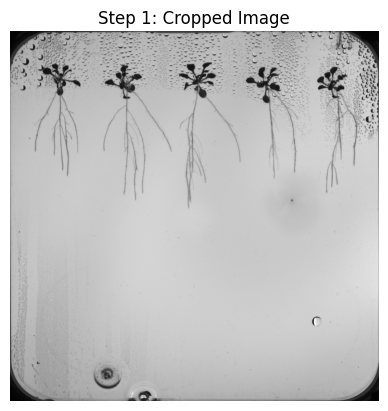

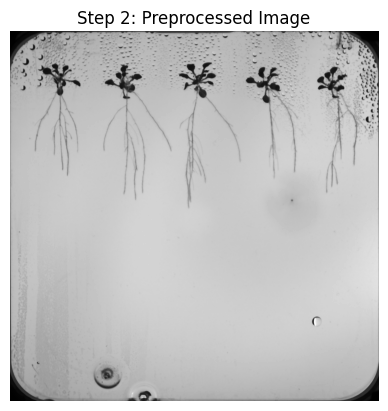

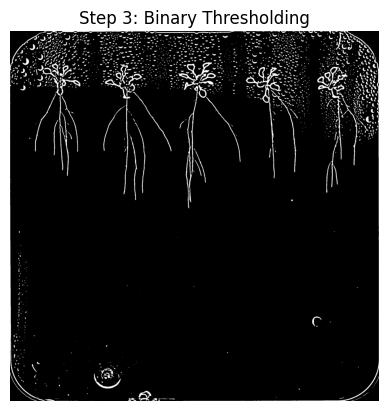

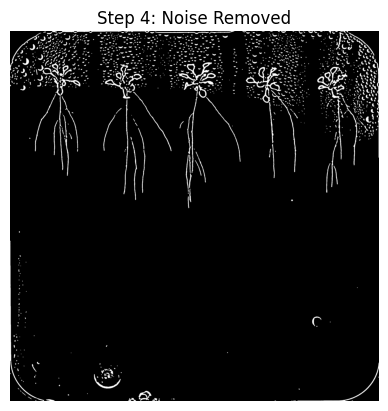

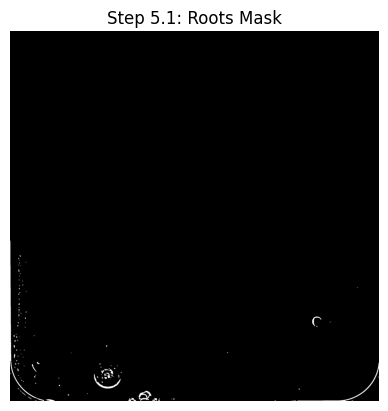

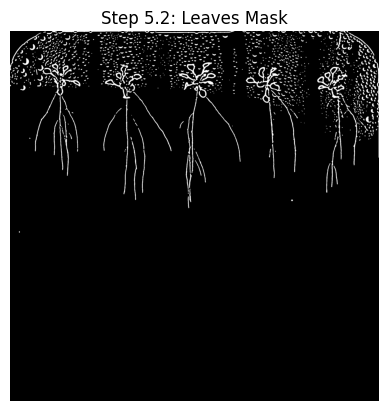

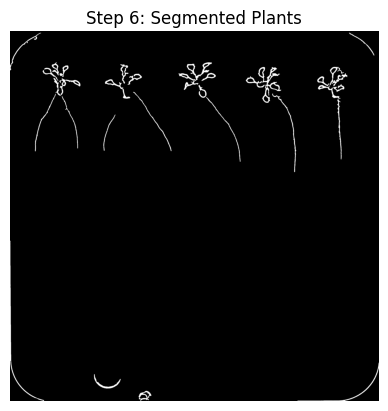

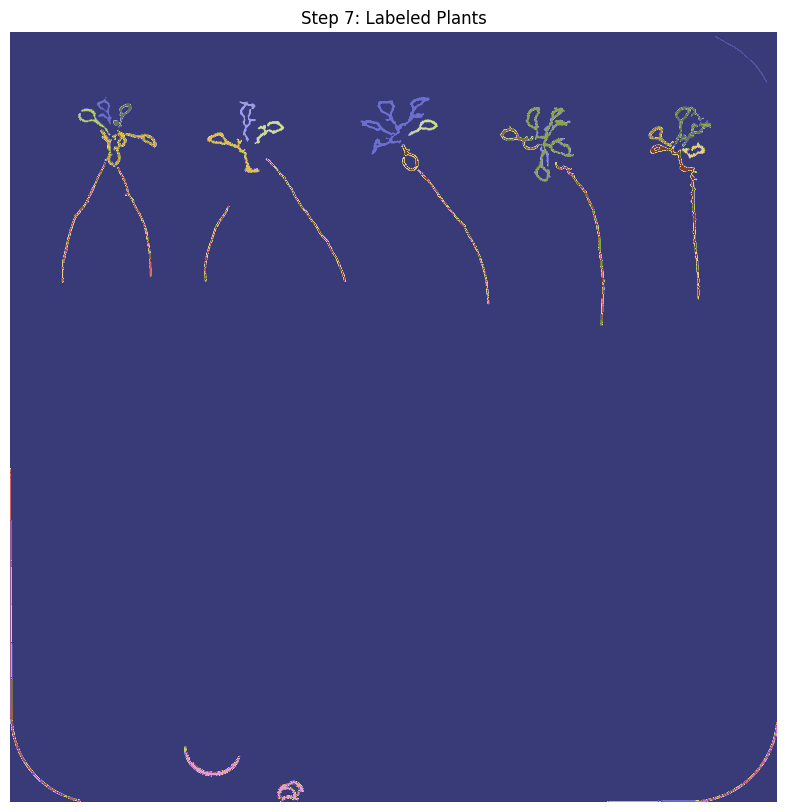

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "task_3_image_2.png"  # Replace with your image path

def full_remove_black_borders(image):
    """
    Fully removes black borders around the Petri dish image, ensuring no black edges remain.

    Args:
        image (numpy array): Input raw image.

    Returns:
        cropped_image (numpy array): Cropped image without black borders.
    """
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to separate black regions
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours of the thresholded image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Select the largest contour assuming it contains the Petri dish
    if not contours:
        raise ValueError("No contours found.")
    
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Get bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Crop the image using the bounding rectangle
    cropped_image = image[y:y + h, x:x + w]
    
    return cropped_image

# Step 1: Load and crop the image
def load_and_crop_image(image_path):
    image = cv2.imread(image_path)
    cropped_image = full_remove_black_borders(image)
    plt.figure()
    plt.title("Step 1: Cropped Image")
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    return cropped_image

# Step 2: Preprocess the image (grayscale and blur)
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(gray, 9)
    plt.figure()
    plt.title("Step 2: Preprocessed Image")
    plt.imshow(blurred, cmap='gray')
    plt.axis("off")
    plt.show()
    return blurred

# Step 3: Apply binary thresholding
def apply_threshold(image):
    block_size = 31
    C = 8
    binary = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, block_size, C)
    plt.figure()
    plt.title("Step 3: Binary Thresholding")
    plt.imshow(binary, cmap='gray')
    plt.axis("off")
    plt.show()
    return binary

# Step 4: Remove small noise
def remove_noise(binary_image):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    opened = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel, iterations=2)
    plt.figure()
    plt.title("Step 4: Noise Removed")
    plt.imshow(closed, cmap='gray')
    plt.axis("off")
    plt.show()
    return closed

# Step 5: Separate roots and leaves with dynamic threshold
def separate_roots_leaves(binary_image):
    h, w = binary_image.shape
    middle = int(h * 0.55)  # Dynamic split based on image height
    root_mask = np.zeros_like(binary_image)
    leaf_mask = np.zeros_like(binary_image)

    root_mask[middle:, :] = binary_image[middle:, :]
    leaf_mask[:middle, :] = binary_image[:middle, :]

    plt.figure()
    plt.title("Step 5.1: Roots Mask")
    plt.imshow(root_mask, cmap='gray')
    plt.axis("off")
    plt.show()

    plt.figure()
    plt.title("Step 5.2: Leaves Mask")
    plt.imshow(leaf_mask, cmap='gray')
    plt.axis("off")
    plt.show()

    return root_mask, leaf_mask

# Step 6: Segment individual plants with shape filtering
def segment_plants(root_mask, leaf_mask):
    combined_mask = cv2.bitwise_or(root_mask, leaf_mask)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(combined_mask, connectivity=8)
    plant_mask = np.zeros_like(combined_mask, dtype=np.uint8)

    for i in range(1, num_labels):  # Skip the background
        x, y, w, h, area = stats[i]
        aspect_ratio = h / w if w > 0 else 0
        if 1500 < area < 50000 and 0.3 < aspect_ratio < 5.0:  # Filter objects by size and shape
            plant_mask[labels == i] = 255

    plt.figure()
    plt.title("Step 6: Segmented Plants")
    plt.imshow(plant_mask, cmap="gray")
    plt.axis("off")
    plt.show()
    return plant_mask

# Step 7: Visualize labeled plants
def visualize_labeled_plants(plant_mask):
    num_labels, labels = cv2.connectedComponents(plant_mask)
    plt.figure(figsize=(10, 10))
    plt.title("Step 7: Labeled Plants")
    plt.imshow(labels, cmap="tab20b")
    plt.axis("off")
    plt.show()

# Main script
if __name__ == "__main__":
    # Step 1: Load and crop the image
    cropped_image = load_and_crop_image(image_path)

    # Step 2: Preprocess the image
    preprocessed_image = preprocess_image(cropped_image)

    # Step 3: Apply thresholding
    binary_image = apply_threshold(preprocessed_image)

    # Step 4: Remove noise
    noise_removed = remove_noise(binary_image)

    # Step 5: Separate roots and leaves
    root_mask, leaf_mask = separate_roots_leaves(noise_removed)

    # Step 6: Segment individual plants
    plant_mask = segment_plants(root_mask, leaf_mask)

    # Step 7: Visualize labeled plants
    visualize_labeled_plants(plant_mask)


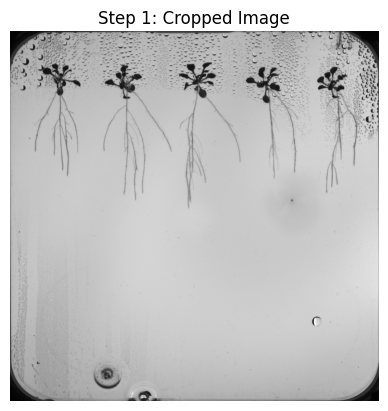

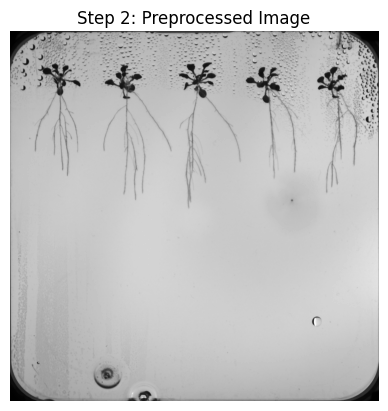

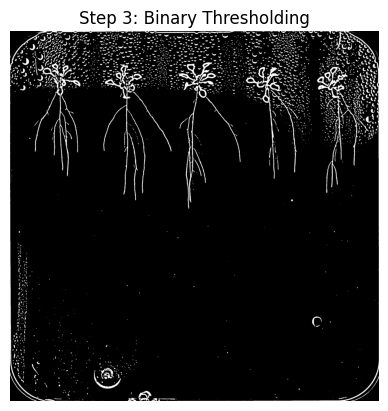

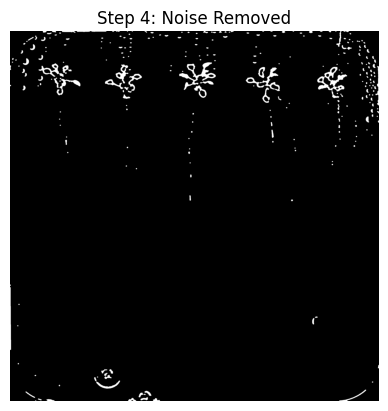

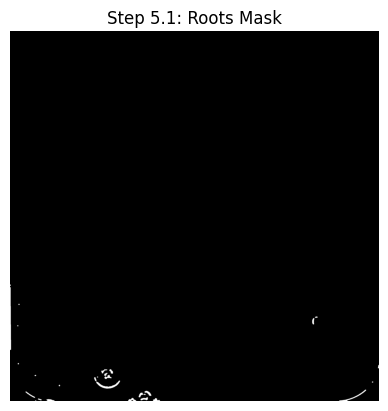

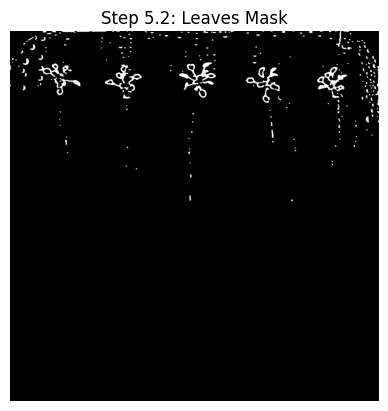

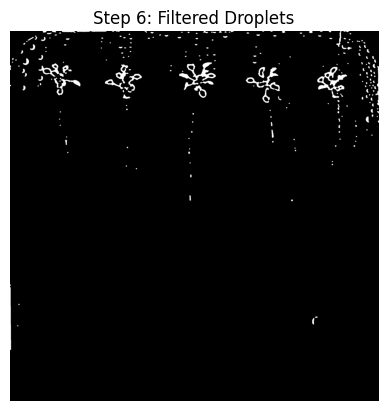

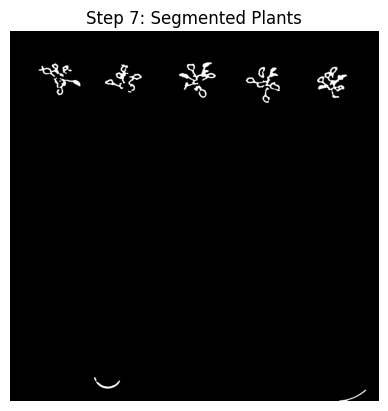

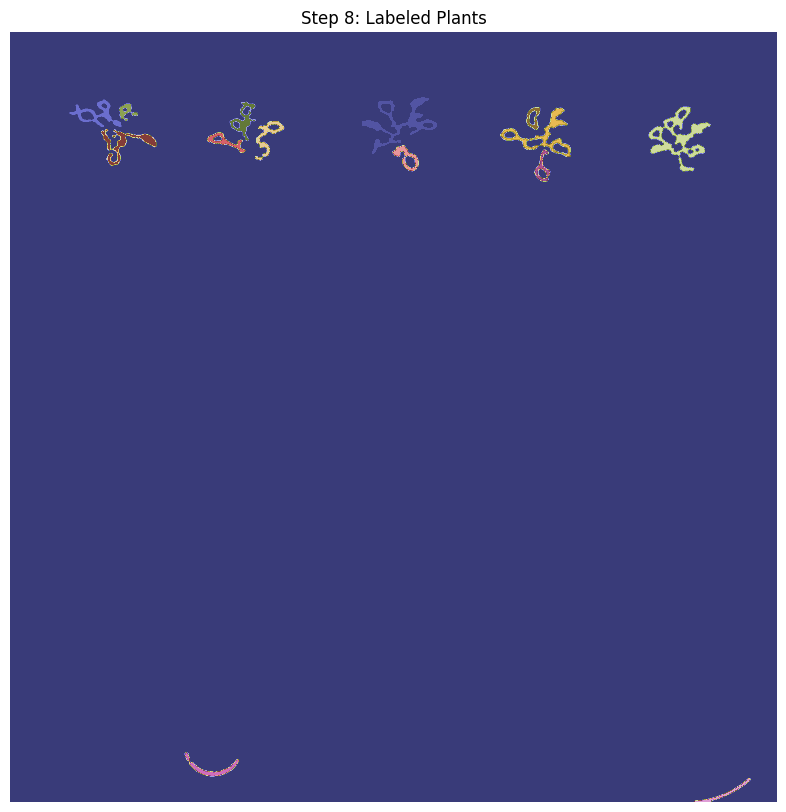

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "task_3_image_2.png"  # Replace with your image path

def full_remove_black_borders(image):
    """
    Fully removes black borders around the Petri dish image, ensuring no black edges remain.

    Args:
        image (numpy array): Input raw image.

    Returns:
        cropped_image (numpy array): Cropped image without black borders.
    """
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to separate black regions
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours of the thresholded image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Select the largest contour assuming it contains the Petri dish
    if not contours:
        raise ValueError("No contours found.")
    
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Get bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Crop the image using the bounding rectangle
    cropped_image = image[y:y + h, x:x + w]
    
    return cropped_image

# Step 1: Load and crop the image
def load_and_crop_image(image_path):
    image = cv2.imread(image_path)
    cropped_image = full_remove_black_borders(image)
    plt.figure()
    plt.title("Step 1: Cropped Image")
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    return cropped_image

# Step 2: Preprocess the image (grayscale and blur)
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(gray, 7)
    plt.figure()
    plt.title("Step 2: Preprocessed Image")
    plt.imshow(blurred, cmap='gray')
    plt.axis("off")
    plt.show()
    return blurred

# Step 3: Apply binary thresholding
def apply_threshold(image):
    block_size = 35
    C = 7
    binary = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, block_size, C)
    plt.figure()
    plt.title("Step 3: Binary Thresholding")
    plt.imshow(binary, cmap='gray')
    plt.axis("off")
    plt.show()
    return binary

# Step 4: Remove small noise
def remove_noise(binary_image):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    opened = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel, iterations=3)
    plt.figure()
    plt.title("Step 4: Noise Removed")
    plt.imshow(closed, cmap='gray')
    plt.axis("off")
    plt.show()
    return closed

# Step 5: Separate roots and leaves with dynamic threshold
def separate_roots_leaves(binary_image):
    h, w = binary_image.shape
    middle = int(h * 0.55)  # Dynamic split based on image height
    root_mask = np.zeros_like(binary_image)
    leaf_mask = np.zeros_like(binary_image)

    root_mask[middle:, :] = binary_image[middle:, :]
    leaf_mask[:middle, :] = binary_image[:middle, :]

    plt.figure()
    plt.title("Step 5.1: Roots Mask")
    plt.imshow(root_mask, cmap='gray')
    plt.axis("off")
    plt.show()

    plt.figure()
    plt.title("Step 5.2: Leaves Mask")
    plt.imshow(leaf_mask, cmap='gray')
    plt.axis("off")
    plt.show()

    return root_mask, leaf_mask

# Step 6: Filter out droplets based on position and size
def filter_droplets(binary_image):
    h, w = binary_image.shape
    mask = np.zeros_like(binary_image)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

    for i in range(1, num_labels):  # Skip background
        x, y, width, height, area = stats[i]
        if y < h * 0.8 and area > 50:  # Exclude droplets in the bottom 20%
            mask[labels == i] = 255

    plt.figure()
    plt.title("Step 6: Filtered Droplets")
    plt.imshow(mask, cmap='gray')
    plt.axis("off")
    plt.show()
    return mask

# Step 7: Segment individual plants with shape filtering
def segment_plants(root_mask, leaf_mask):
    combined_mask = cv2.bitwise_or(root_mask, leaf_mask)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(combined_mask, connectivity=8)
    plant_mask = np.zeros_like(combined_mask, dtype=np.uint8)

    for i in range(1, num_labels):  # Skip the background
        x, y, w, h, area = stats[i]
        aspect_ratio = h / w if w > 0 else 0
        if 1500 < area < 50000 and 0.3 < aspect_ratio < 5.0:  # Filter objects by size and shape
            plant_mask[labels == i] = 255

    plt.figure()
    plt.title("Step 7: Segmented Plants")
    plt.imshow(plant_mask, cmap="gray")
    plt.axis("off")
    plt.show()
    return plant_mask

# Step 8: Visualize labeled plants
def visualize_labeled_plants(plant_mask):
    num_labels, labels = cv2.connectedComponents(plant_mask)
    plt.figure(figsize=(10, 10))
    plt.title("Step 8: Labeled Plants")
    plt.imshow(labels, cmap="tab20b")
    plt.axis("off")
    plt.show()

# Main script
if __name__ == "__main__":
    # Step 1: Load and crop the image
    cropped_image = load_and_crop_image(image_path)

    # Step 2: Preprocess the image
    preprocessed_image = preprocess_image(cropped_image)

    # Step 3: Apply thresholding
    binary_image = apply_threshold(preprocessed_image)

    # Step 4: Remove noise
    noise_removed = remove_noise(binary_image)

    # Step 5: Separate roots and leaves
    root_mask, leaf_mask = separate_roots_leaves(noise_removed)

    # Step 6: Filter droplets
    filtered_image = filter_droplets(noise_removed)

    # Step 7: Segment individual plants
    plant_mask = segment_plants(root_mask, leaf_mask)

    # Step 8: Visualize labeled plants
    visualize_labeled_plants(plant_mask)


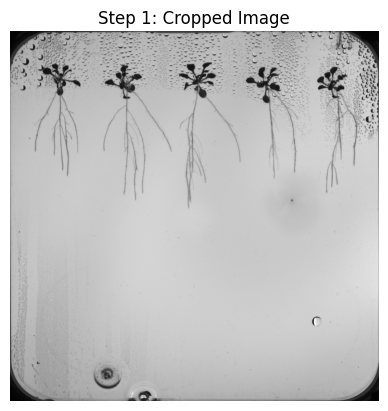

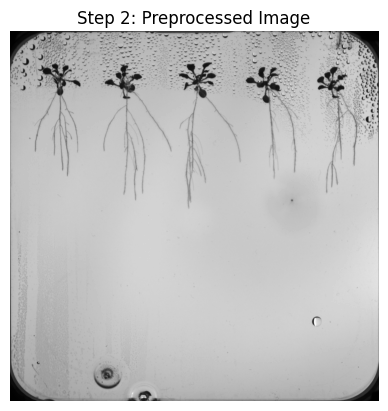

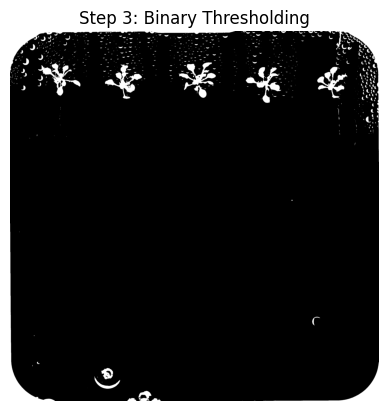

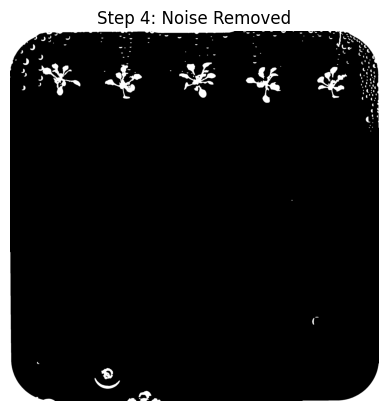

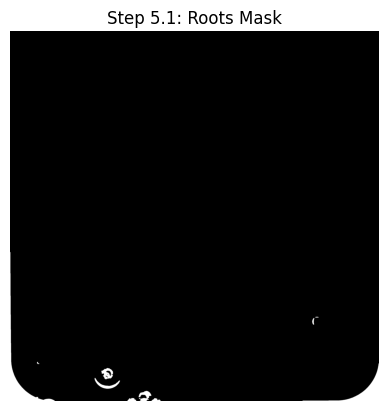

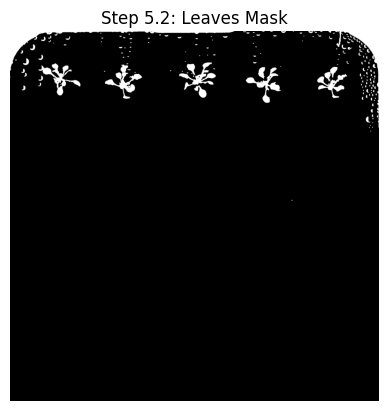

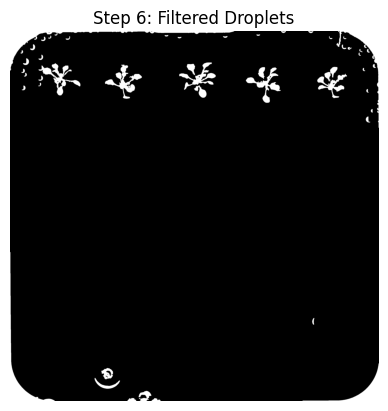

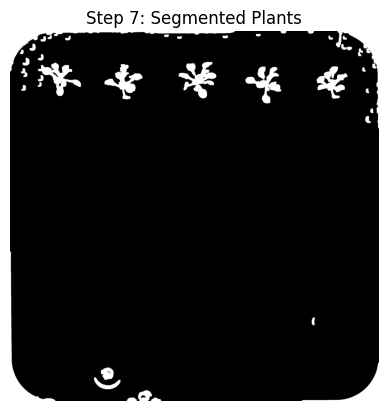

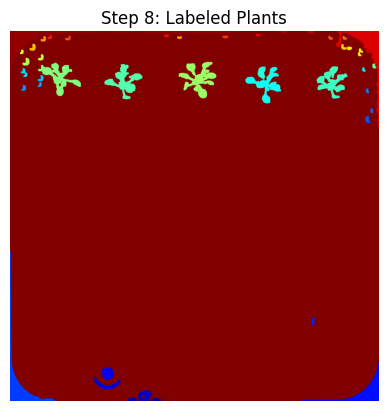

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and crop the image
def full_remove_black_borders(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    cropped_image = image[y:y + h, x:x + w]
    return cropped_image

image_path = "task_3_image_2.png"
image = cv2.imread(image_path)
cropped_image = full_remove_black_borders(image)
plt.figure()
plt.title("Step 1: Cropped Image")
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Step 2: Convert to grayscale and preprocess
gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.figure()
plt.title("Step 2: Preprocessed Image")
plt.imshow(blurred, cmap='gray')
plt.axis("off")
plt.show()

# Step 3: Binary thresholding
_, binary_thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV)
plt.figure()
plt.title("Step 3: Binary Thresholding")
plt.imshow(binary_thresh, cmap='gray')
plt.axis("off")
plt.show()

# Step 4: Noise removal
kernel = np.ones((3, 3), np.uint8)
opened = cv2.morphologyEx(binary_thresh, cv2.MORPH_OPEN, kernel, iterations=2)
plt.figure()
plt.title("Step 4: Noise Removed")
plt.imshow(opened, cmap='gray')
plt.axis("off")
plt.show()

# Step 5.1: Extract roots
roots_mask = np.zeros_like(opened)
roots_mask[opened.shape[0] // 2:, :] = opened[opened.shape[0] // 2:, :]
plt.figure()
plt.title("Step 5.1: Roots Mask")
plt.imshow(roots_mask, cmap='gray')
plt.axis("off")
plt.show()

# Step 5.2: Extract leaves
leaves_mask = np.zeros_like(opened)
leaves_mask[:opened.shape[0] // 2, :] = opened[:opened.shape[0] // 2, :]
plt.figure()
plt.title("Step 5.2: Leaves Mask")
plt.imshow(leaves_mask, cmap='gray')
plt.axis("off")
plt.show()

# Step 6: Remove small droplets and refine
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(opened)
filtered_mask = np.zeros_like(opened)
for i in range(1, num_labels):
    area = stats[i, cv2.CC_STAT_AREA]
    if area > 200:  # Adjust the area threshold as needed
        filtered_mask[labels == i] = 255

plt.figure()
plt.title("Step 6: Filtered Droplets")
plt.imshow(filtered_mask, cmap='gray')
plt.axis("off")
plt.show()

# Step 7: Segment individual plants
kernel_dilate = np.ones((5, 5), np.uint8)
dilated = cv2.dilate(filtered_mask, kernel_dilate, iterations=2)
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(dilated)
segmented_plants = np.zeros_like(filtered_mask)
for i in range(1, num_labels):
    segmented_plants[labels == i] = 255

plt.figure()
plt.title("Step 7: Segmented Plants")
plt.imshow(segmented_plants, cmap='gray')
plt.axis("off")
plt.show()

# Step 8: Color-label individual plants
colored_labels = cv2.applyColorMap((labels * 255 // num_labels).astype('uint8'), cv2.COLORMAP_JET)
plt.figure()
plt.title("Step 8: Labeled Plants")
plt.imshow(colored_labels)
plt.axis("off")
plt.show()


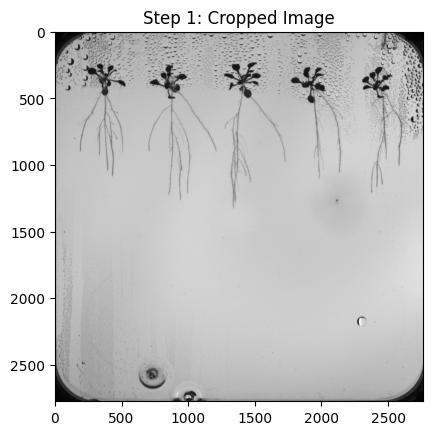

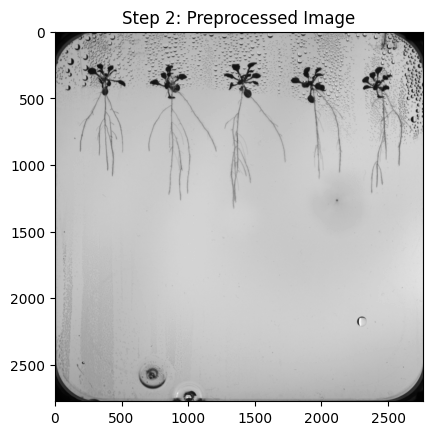

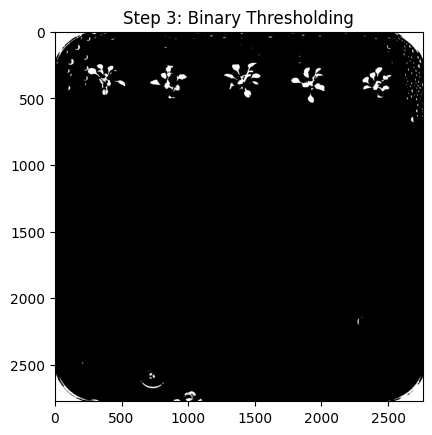

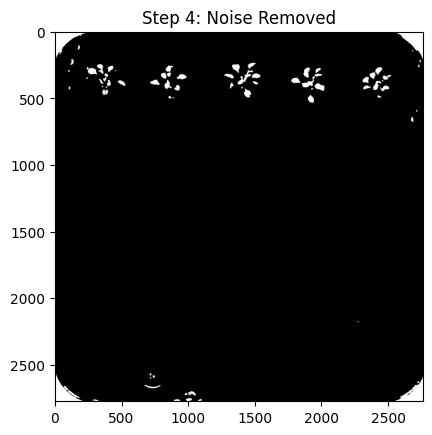

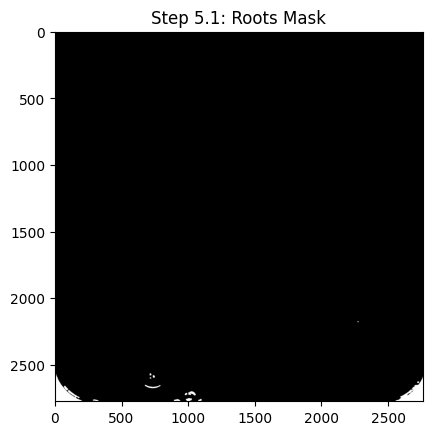

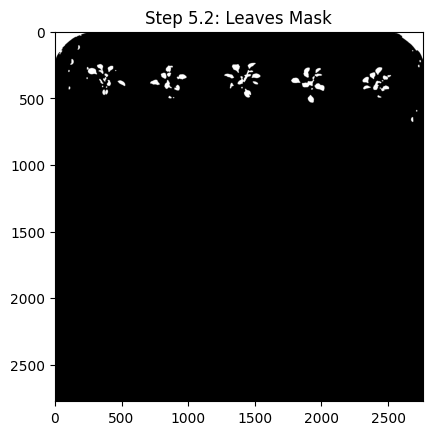

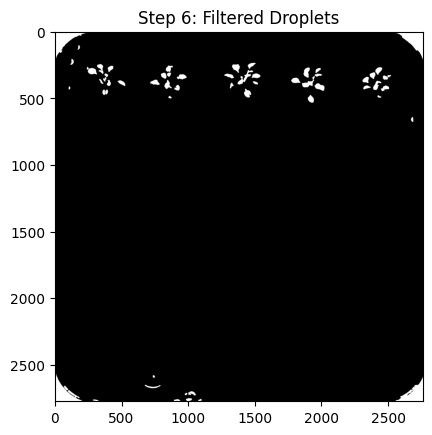

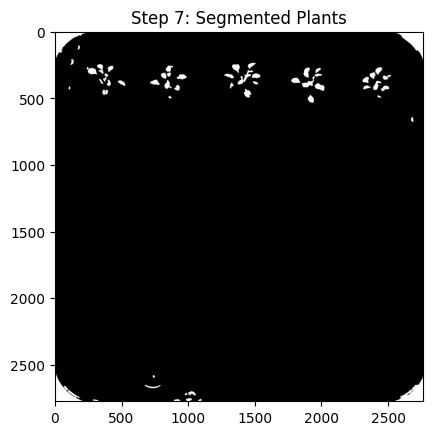

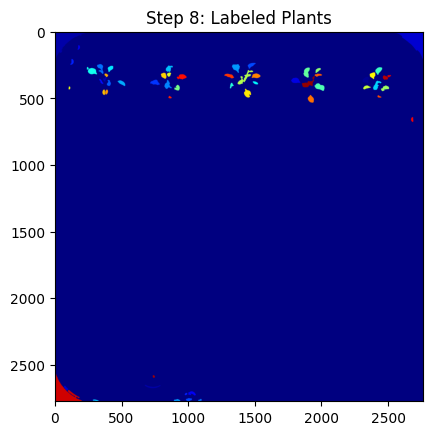

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "task_3_image_2.png"
image = cv2.imread(image_path)

# Step 1: Remove black borders
def full_remove_black_borders(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        raise ValueError("No contours found.")
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    cropped_image = image[y:y + h, x:x + w]
    return cropped_image

cropped_image = full_remove_black_borders(image)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title("Step 1: Cropped Image")
plt.show()

# Step 2: Preprocessing (convert to grayscale and apply blur)
gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred, cmap='gray')
plt.title("Step 2: Preprocessed Image")
plt.show()

# Step 3: Binary Thresholding
_, binary = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary, cmap='gray')
plt.title("Step 3: Binary Thresholding")
plt.show()

# Step 4: Noise Removal with Morphological Operations
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
plt.imshow(opened, cmap='gray')
plt.title("Step 4: Noise Removed")
plt.show()

# Step 5: Separate Roots and Leaves
height, width = opened.shape
roots_mask = np.zeros_like(opened)
leaves_mask = np.zeros_like(opened)

# Split the image into top (leaves) and bottom (roots) halves
leaves_mask[:height // 2, :] = opened[:height // 2, :]
roots_mask[height // 2:, :] = opened[height // 2:, :]

plt.imshow(roots_mask, cmap='gray')
plt.title("Step 5.1: Roots Mask")
plt.show()

plt.imshow(leaves_mask, cmap='gray')
plt.title("Step 5.2: Leaves Mask")
plt.show()

# Step 6: Remove Small Objects (Droplets)
def remove_small_objects(binary_image, min_size):
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
    new_image = np.zeros_like(binary_image)
    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] >= min_size:
            new_image[labels == i] = 255
    return new_image

filtered_leaves = remove_small_objects(leaves_mask, 200)
filtered_roots = remove_small_objects(roots_mask, 200)

filtered_combined = cv2.bitwise_or(filtered_leaves, filtered_roots)
plt.imshow(filtered_combined, cmap='gray')
plt.title("Step 6: Filtered Droplets")
plt.show()

# Step 7: Final Segmentation
segmented = cv2.bitwise_or(filtered_leaves, filtered_roots)
plt.imshow(segmented, cmap='gray')
plt.title("Step 7: Segmented Plants")
plt.show()

# Step 8: Label Plants
num_labels, labels = cv2.connectedComponents(segmented)
labeled_image = cv2.applyColorMap((labels * 10 % 255).astype(np.uint8), cv2.COLORMAP_JET)
plt.imshow(cv2.cvtColor(labeled_image, cv2.COLOR_BGR2RGB))
plt.title("Step 8: Labeled Plants")
plt.show()


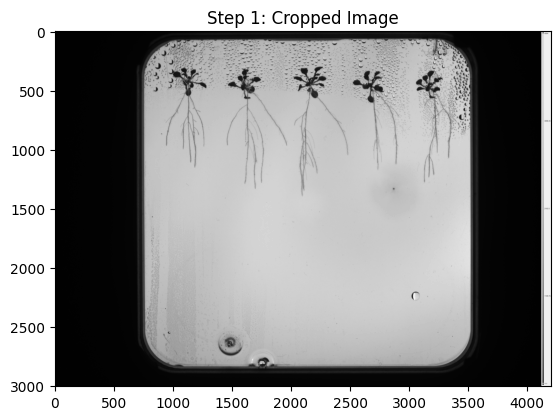

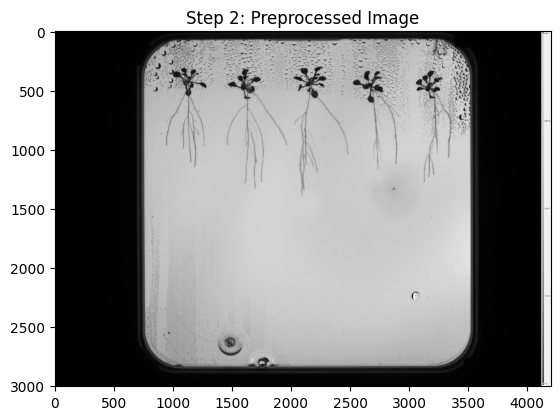

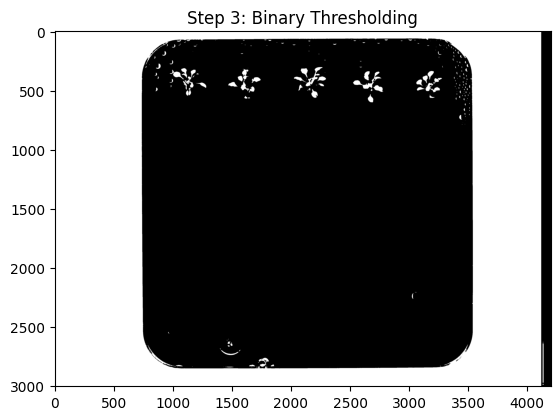

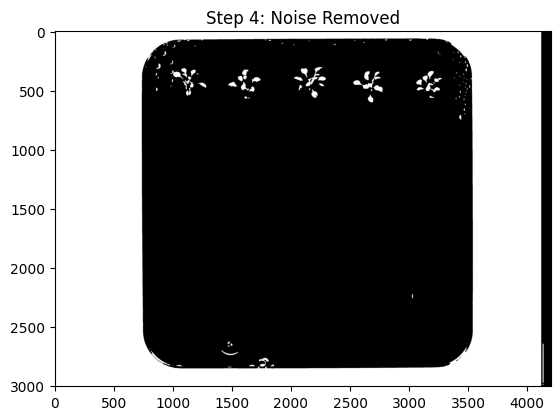

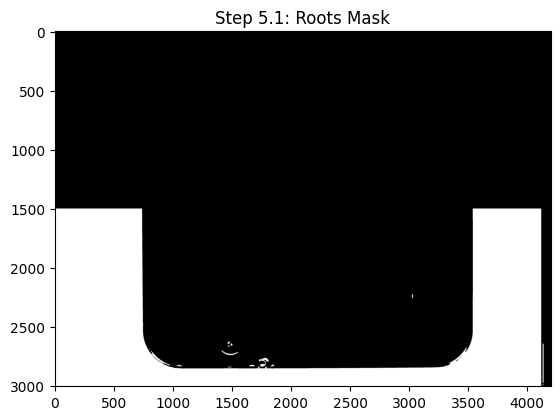

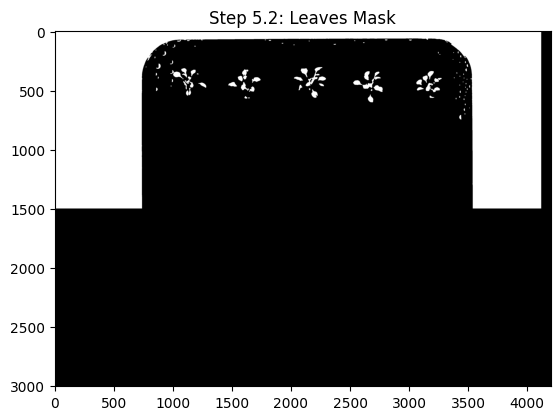

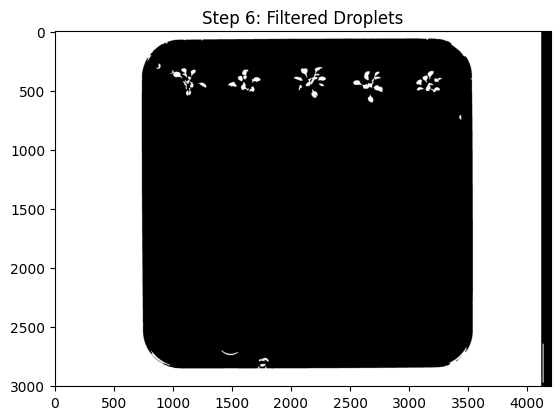

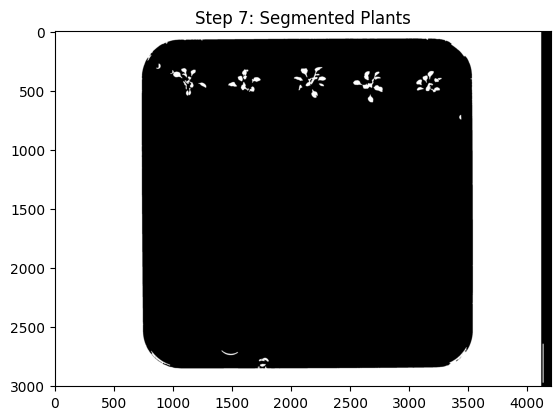

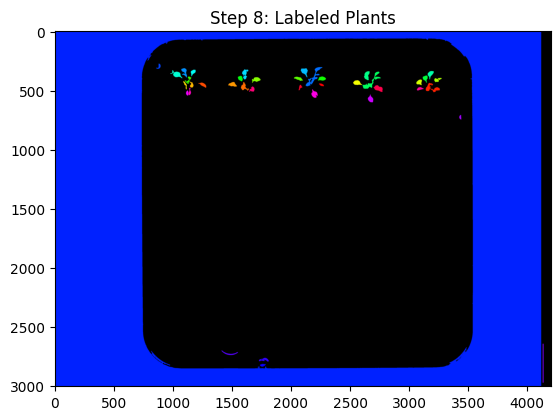

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to remove black borders
def full_remove_black_borders(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        raise ValueError("No contours found.")
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    return image[y:y + h, x:x + w]

# Function to display images
def show_image(step, img):
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title(step)
    plt.show()

# Load and preprocess the image
image_path = "task_3_image_2.png"
original_image = cv2.imread(image_path)
cropped_image = full_remove_black_borders(original_image)
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
show_image("Step 1: Cropped Image", gray_image)

# Step 2: Preprocessing (Gaussian Blur)
preprocessed_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
show_image("Step 2: Preprocessed Image", preprocessed_image)

# Step 3: Binary Thresholding
_, binary_image = cv2.threshold(preprocessed_image, 50, 255, cv2.THRESH_BINARY_INV)
show_image("Step 3: Binary Thresholding", binary_image)

# Step 4: Noise Removal
kernel = np.ones((3, 3), np.uint8)
noise_removed = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)
show_image("Step 4: Noise Removed", noise_removed)

# Step 5.1: Extract Roots
roots_mask = noise_removed.copy()
roots_mask[:int(0.5 * roots_mask.shape[0]), :] = 0
show_image("Step 5.1: Roots Mask", roots_mask)

# Step 5.2: Extract Leaves
leaves_mask = noise_removed.copy()
leaves_mask[int(0.5 * leaves_mask.shape[0]):, :] = 0
show_image("Step 5.2: Leaves Mask", leaves_mask)

# Step 6: Filter Droplets
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(noise_removed, connectivity=8)
for i in range(1, num_labels):
    if stats[i, cv2.CC_STAT_AREA] < 500:
        noise_removed[labels == i] = 0
show_image("Step 6: Filtered Droplets", noise_removed)

# Step 7: Segment Plants
segmented_plants = cv2.bitwise_and(noise_removed, noise_removed, mask=roots_mask | leaves_mask)
show_image("Step 7: Segmented Plants", segmented_plants)

# Step 8: Label Plants
num_labels, labels_im = cv2.connectedComponents(segmented_plants)
label_hue = np.uint8(179 * labels_im / np.max(labels_im))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0
show_image("Step 8: Labeled Plants", labeled_img)

---

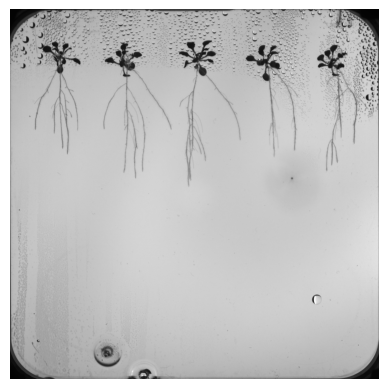

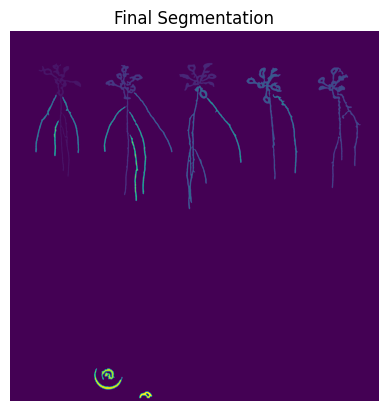

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_black_borders(image):
    """
    Removes black borders around the Petri dish image by detecting contours.

    Args:
        image (numpy array): Input raw image.

    Returns:
        numpy array: Cropped image without black borders.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        raise ValueError("No contours found.")
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    return image[y:y + h, x:x + w]

def create_polygon_mask(shape):
    """
    Creates a polygon mask to isolate the region of interest.

    Args:
        shape (tuple): Shape of the image (height, width).

    Returns:
        numpy array: Mask with the polygon applied.
    """
    mask = np.zeros(shape, dtype="uint8")
    h, w = shape
    points = np.array([
        [int(0.2 * w), int(0.01 * h)],
        [int(0.8 * w), int(0.01 * h)],
        [int(0.94 * w), int(0.06 * h)],
        [int(0.99 * w), int(0.2 * h)],
        [int(0.99 * w), int(0.8 * h)],
        [int(0.94 * w), int(0.94 * h)],
        [int(0.8 * w), int(0.99 * h)],
        [int(0.2 * w), int(0.99 * h)],
        [int(0.06 * w), int(0.94 * h)],
        [int(0.01 * w), int(0.8 * h)],
        [int(0.01 * w), int(0.2 * h)],
        [int(0.06 * w), int(0.06 * h)]
    ], dtype=np.int32)
    cv2.fillConvexPoly(mask, points, 255)
    return mask

def process_image(image_path):
    """
    Processes an input image to perform instance segmentation.

    Args:
        image_path (str): Path to the input image.

    Returns:
        None: Displays the intermediate and final results.
    """
    image = cv2.imread(image_path)

    # Step 1: Crop the Petri dish
    cropped = remove_black_borders(image)
    plt.figure()
    plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    # Step 2: Convert to grayscale and blur
    grayscale = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(grayscale, 11)

    # Step 3: Adaptive thresholding
    thresholded = cv2.adaptiveThreshold(
        blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 5
    )

    # Step 4: Apply polygon mask
    mask = create_polygon_mask(thresholded.shape)
    masked_image = cv2.bitwise_and(thresholded, mask)

    # Step 5: Remove small objects
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(masked_image)
    min_size = 1800
    filtered_image = np.zeros_like(masked_image)
    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] >= min_size:
            filtered_image[labels == i] = 255

    # Step 6: Segment top and bottom regions
    h, w = filtered_image.shape
    bottom_mask = np.zeros_like(filtered_image)
    bottom_mask[int(0.4 * h):, :] = 255
    top_region = cv2.bitwise_and(filtered_image, cv2.bitwise_not(bottom_mask))
    bottom_region = cv2.bitwise_and(filtered_image, bottom_mask)

    # Step 7: Process bottom region
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(bottom_region)
    refined_bottom = np.zeros_like(bottom_region)
    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]
        if area < 50000:
            refined_bottom[labels == i] = 255

    # Step 8: Combine regions and refine
    combined = cv2.bitwise_or(top_region, refined_bottom)
    kernel = np.ones((2, 2), dtype="uint8")
    final_mask = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel, iterations=5)

    # Step 9: Display final result
    num_labels, labels, _, _ = cv2.connectedComponentsWithStats(final_mask)
    plt.figure()
    plt.title("Final Segmentation")
    plt.imshow(labels, cmap="viridis")
    plt.axis("off")
    plt.show()

# Replace with the path to your image
process_image("task_3_image_2.png")

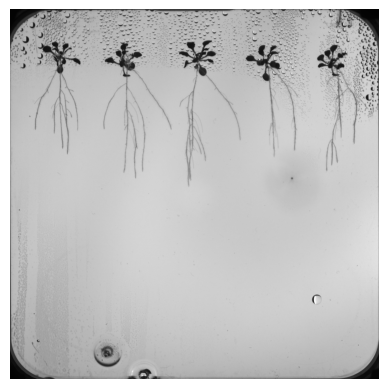

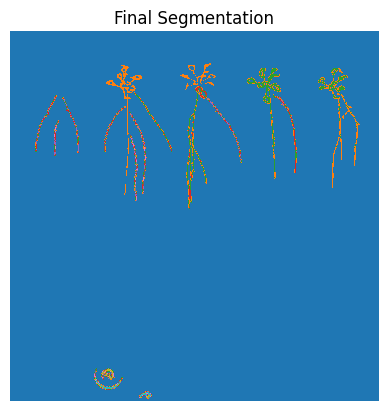

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_black_borders(image):
    """
    Removes black borders around the Petri dish image by detecting contours.

    Args:
        image (numpy array): Input raw image.

    Returns:
        numpy array: Cropped image without black borders.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        raise ValueError("No contours found.")
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    return image[y:y + h, x:x + w]

def create_polygon_mask(shape):
    """
    Creates a polygon mask to isolate the region of interest.

    Args:
        shape (tuple): Shape of the image (height, width).

    Returns:
        numpy array: Mask with the polygon applied.
    """
    mask = np.zeros(shape, dtype="uint8")
    h, w = shape
    points = np.array([
        [int(0.2 * w), int(0.01 * h)],
        [int(0.8 * w), int(0.01 * h)],
        [int(0.94 * w), int(0.06 * h)],
        [int(0.99 * w), int(0.2 * h)],
        [int(0.99 * w), int(0.8 * h)],
        [int(0.94 * w), int(0.94 * h)],
        [int(0.8 * w), int(0.99 * h)],
        [int(0.2 * w), int(0.99 * h)],
        [int(0.06 * w), int(0.94 * h)],
        [int(0.01 * w), int(0.8 * h)],
        [int(0.01 * w), int(0.2 * h)],
        [int(0.06 * w), int(0.06 * h)]
    ], dtype=np.int32)
    cv2.fillConvexPoly(mask, points, 255)
    return mask

def process_image(image_path):
    """
    Processes an input image to perform instance segmentation.

    Args:
        image_path (str): Path to the input image.

    Returns:
        None: Displays the intermediate and final results.
    """
    image = cv2.imread(image_path)

    # Step 1: Crop the Petri dish
    cropped = remove_black_borders(image)
    plt.figure()
    plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    # Step 2: Convert to grayscale and blur
    grayscale = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(grayscale, 11)

    # Step 3: Adaptive thresholding
    thresholded = cv2.adaptiveThreshold(
        blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 5
    )

    # Step 4: Apply polygon mask
    mask = create_polygon_mask(thresholded.shape)
    masked_image = cv2.bitwise_and(thresholded, mask)

    # Step 5: Remove small objects
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(masked_image)
    min_size = 1800
    filtered_image = np.zeros_like(masked_image)
    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] >= min_size:
            filtered_image[labels == i] = 255

    # Step 6: Segment top and bottom regions
    h, w = filtered_image.shape
    bottom_mask = np.zeros_like(filtered_image)
    bottom_mask[int(0.4 * h):, :] = 255
    top_region = cv2.bitwise_and(filtered_image, cv2.bitwise_not(bottom_mask))
    bottom_region = cv2.bitwise_and(filtered_image, bottom_mask)

    # Step 7: Process bottom region
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(bottom_region)
    refined_bottom = np.zeros_like(bottom_region)
    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]
        x, y, w, h = stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP], stats[i, cv2.CC_STAT_WIDTH], stats[i, cv2.CC_STAT_HEIGHT]
        if area < 50000 and y > int(0.5 * h):
            refined_bottom[labels == i] = 255

    # Step 8: Combine regions and refine
    combined = cv2.bitwise_or(top_region, refined_bottom)
    kernel = np.ones((2, 2), dtype="uint8")
    final_mask = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel, iterations=5)

    # Step 9: Display final result
    num_labels, labels, _, _ = cv2.connectedComponentsWithStats(final_mask)
    plt.figure()
    plt.title("Final Segmentation")
    plt.imshow(labels, cmap="tab10")
    plt.axis("off")
    plt.show()

# Replace with the path to your image
process_image("task_3_image_2.png")

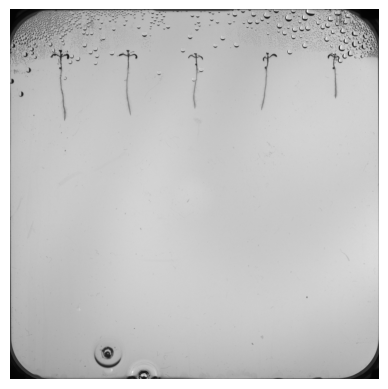

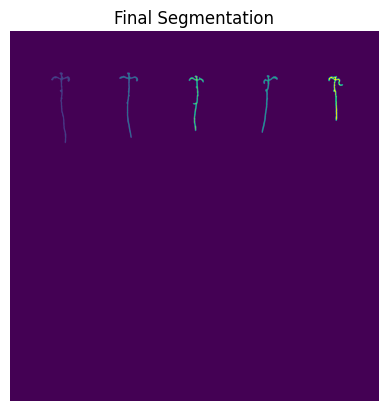

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_black_borders(image):
    """
    Removes black borders around the Petri dish image by detecting contours.

    Args:
        image (numpy array): Input raw image.

    Returns:
        numpy array: Cropped image without black borders.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        raise ValueError("No contours found.")
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    return image[y:y + h, x:x + w]

def create_polygon_mask(shape):
    """
    Creates a polygon mask to isolate the region of interest.

    Args:
        shape (tuple): Shape of the image (height, width).

    Returns:
        numpy array: Mask with the polygon applied.
    """
    mask = np.zeros(shape, dtype="uint8")
    h, w = shape
    points = np.array([
        [int(0.2 * w), int(0.01 * h)],
        [int(0.8 * w), int(0.01 * h)],
        [int(0.94 * w), int(0.06 * h)],
        [int(0.99 * w), int(0.2 * h)],
        [int(0.99 * w), int(0.8 * h)],
        [int(0.94 * w), int(0.94 * h)],
        [int(0.8 * w), int(0.99 * h)],
        [int(0.2 * w), int(0.99 * h)],
        [int(0.06 * w), int(0.94 * h)],
        [int(0.01 * w), int(0.8 * h)],
        [int(0.01 * w), int(0.2 * h)],
        [int(0.06 * w), int(0.06 * h)]
    ], dtype=np.int32)
    cv2.fillConvexPoly(mask, points, 255)
    return mask

def process_image(image_path):
    """
    Processes an input image to perform instance segmentation.

    Args:
        image_path (str): Path to the input image.

    Returns:
        None: Displays the intermediate and final results.
    """
    image = cv2.imread(image_path)

    # Step 1: Crop the Petri dish
    cropped = remove_black_borders(image)
    plt.figure()
    plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

    # Step 2: Convert to grayscale and blur
    grayscale = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(grayscale, 11)

    # Step 3: Adaptive thresholding
    thresholded = cv2.adaptiveThreshold(
        blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 5
    )

    # Step 4: Apply polygon mask
    mask = create_polygon_mask(thresholded.shape)
    masked_image = cv2.bitwise_and(thresholded, mask)

    # Step 5: Remove small objects
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(masked_image)
    min_size = 1800
    filtered_image = np.zeros_like(masked_image)
    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] >= min_size:
            filtered_image[labels == i] = 255

    # Step 6: Segment top and bottom regions
    h, w = filtered_image.shape
    bottom_mask = np.zeros_like(filtered_image)
    bottom_mask[int(0.4 * h):, :] = 255
    top_region = cv2.bitwise_and(filtered_image, cv2.bitwise_not(bottom_mask))
    bottom_region = cv2.bitwise_and(filtered_image, bottom_mask)

    # Step 7: Process bottom region
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(bottom_region)
    refined_bottom = np.zeros_like(bottom_region)
    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]
        x, y, w, h = stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP], stats[i, cv2.CC_STAT_WIDTH], stats[i, cv2.CC_STAT_HEIGHT]
        if area < 50000 and h / w > 1.2:
            refined_bottom[labels == i] = 255

    # Step 8: Combine regions and refine
    combined = cv2.bitwise_or(top_region, refined_bottom)
    kernel = np.ones((2, 2), dtype="uint8")
    final_mask = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel, iterations=5)

    # Step 9: Display final result
    num_labels, labels, _, _ = cv2.connectedComponentsWithStats(final_mask)
    plt.figure()
    plt.title("Final Segmentation")
    plt.imshow(labels, cmap="viridis")
    plt.axis("off")
    plt.show()

# Replace with the path to your image
process_image("task_3_image_1.png")


---

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to image
image = cv2.imread("task_3_image_1.png")

def remove_black_borders(image):
    """
    Removes black borders around the Petri dish image by detecting contours.

    Args:
        image (numpy array): Input raw image.

    Returns:
        numpy array: Cropped image without black borders.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        raise ValueError("No contours found.")
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    return image[y:y + h, x:x + w]


In [4]:
def create_polygon_mask(shape):
    """
    Creates a polygon mask to isolate the region of interest.

    Args:
        shape (tuple): Shape of the image (height, width).

    Returns:
        numpy array: Mask with the polygon applied.
    """
    mask = np.zeros(shape, dtype="uint8")
    h, w = shape
    points = np.array([
        [int(0.2 * w), int(0.01 * h)],
        [int(0.8 * w), int(0.01 * h)],
        [int(0.94 * w), int(0.06 * h)],
        [int(0.99 * w), int(0.2 * h)],
        [int(0.99 * w), int(0.8 * h)],
        [int(0.94 * w), int(0.94 * h)],
        [int(0.8 * w), int(0.99 * h)],
        [int(0.2 * w), int(0.99 * h)],
        [int(0.06 * w), int(0.94 * h)],
        [int(0.01 * w), int(0.8 * h)],
        [int(0.01 * w), int(0.2 * h)],
        [int(0.06 * w), int(0.06 * h)]
    ], dtype=np.int32)
    cv2.fillConvexPoly(mask, points, 255)
    return mask

def process_image(image_path):
    """
    Processes an input image to perform instance segmentation.

    Args:
        image_path (str): Path to the input image.

    Returns:
        None: Displays the intermediate and final results.
    """
    image = cv2.imread(image_path)

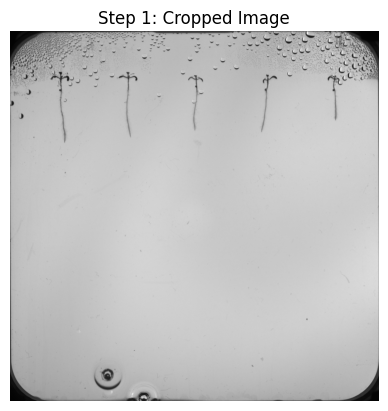

In [5]:
# Step 1: Crop the Petri dish
cropped = remove_black_borders(image)
plt.figure()
plt.title("Step 1: Cropped Image")
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

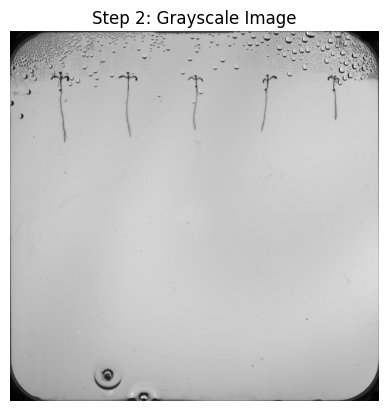

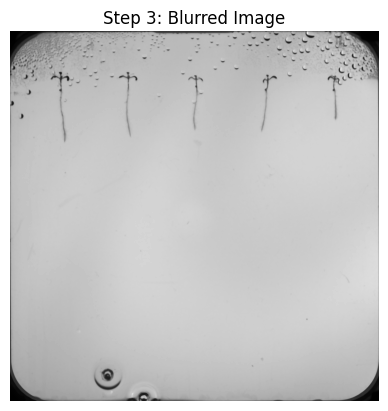

In [6]:
# Step 2: Convert to grayscale and blur
grayscale = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.title("Step 2: Grayscale Image")
plt.imshow(grayscale, cmap="gray")
plt.axis("off")
plt.show()

blurred = cv2.medianBlur(grayscale, 11)
plt.figure()
plt.title("Step 3: Blurred Image")
plt.imshow(blurred, cmap="gray")
plt.axis("off")
plt.show()

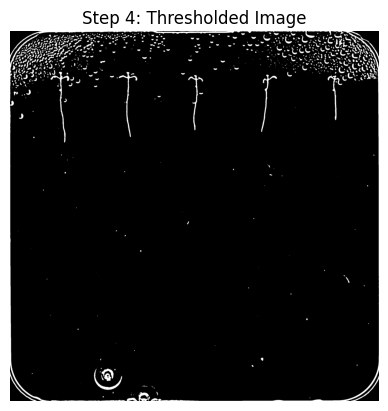

In [7]:
# Step 3: Adaptive thresholding
thresholded = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 5
)
plt.figure()
plt.title("Step 4: Thresholded Image")
plt.imshow(thresholded, cmap="gray")
plt.axis("off")
plt.show()

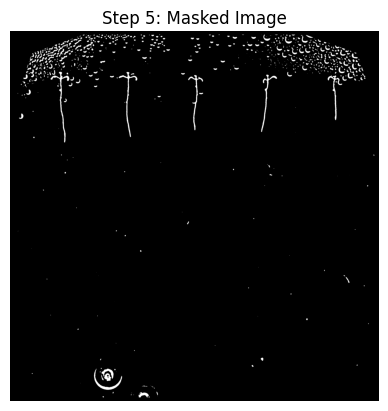

In [8]:
# Step 4: Apply polygon mask
mask = create_polygon_mask(thresholded.shape)
masked_image = cv2.bitwise_and(thresholded, mask)
plt.figure()
plt.title("Step 5: Masked Image")
plt.imshow(masked_image, cmap="gray")
plt.axis("off")
plt.show()

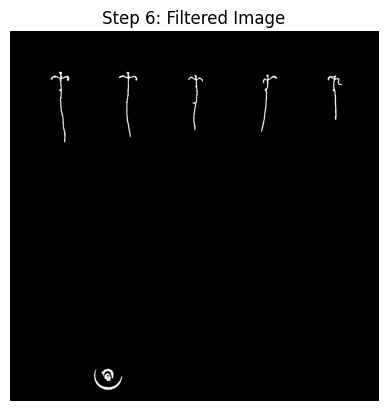

In [9]:
# Step 5: Remove small objects
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(masked_image)
min_size = 1800
filtered_image = np.zeros_like(masked_image)
for i in range(1, num_labels):
    if stats[i, cv2.CC_STAT_AREA] >= min_size:
        filtered_image[labels == i] = 255
plt.figure()
plt.title("Step 6: Filtered Image")
plt.imshow(filtered_image, cmap="gray")
plt.axis("off")
plt.show()


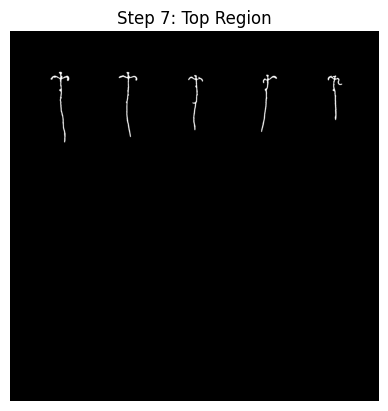

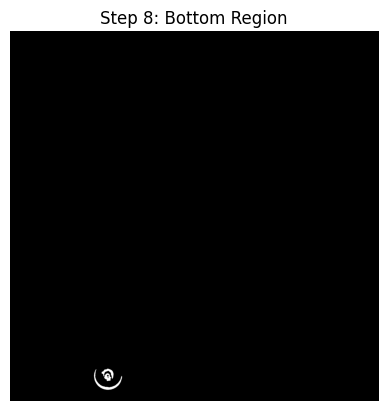

In [10]:
# Step 6: Segment top and bottom regions
h, w = filtered_image.shape
bottom_mask = np.zeros_like(filtered_image)
bottom_mask[int(0.4 * h):, :] = 255
top_region = cv2.bitwise_and(filtered_image, cv2.bitwise_not(bottom_mask))
bottom_region = cv2.bitwise_and(filtered_image, bottom_mask)

plt.figure()
plt.title("Step 7: Top Region")
plt.imshow(top_region, cmap="gray")
plt.axis("off")
plt.show()

plt.figure()
plt.title("Step 8: Bottom Region")
plt.imshow(bottom_region, cmap="gray")
plt.axis("off")
plt.show()

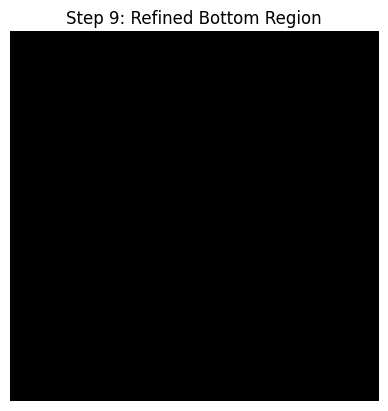

In [11]:
# Step 7: Process bottom region
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(bottom_region)
refined_bottom = np.zeros_like(bottom_region)
for i in range(1, num_labels):
    area = stats[i, cv2.CC_STAT_AREA]
    x, y, w, h = stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP], stats[i, cv2.CC_STAT_WIDTH], stats[i, cv2.CC_STAT_HEIGHT]
    if area < 50000 and h / w > 1.2:
        refined_bottom[labels == i] = 255

plt.figure()
plt.title("Step 9: Refined Bottom Region")
plt.imshow(refined_bottom, cmap="gray")
plt.axis("off")
plt.show()

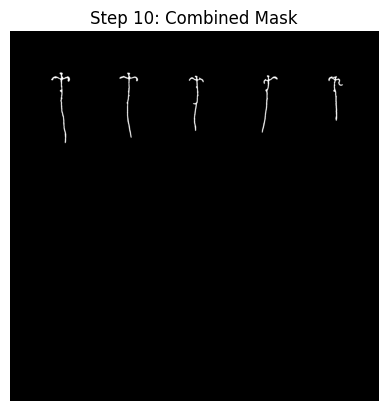

In [12]:
# Step 8: Combine regions and refine
combined = cv2.bitwise_or(top_region, refined_bottom)
kernel = np.ones((2, 2), dtype="uint8")
final_mask = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel, iterations=5)

plt.figure()
plt.title("Step 10: Combined Mask")
plt.imshow(final_mask, cmap="gray")
plt.axis("off")
plt.show()

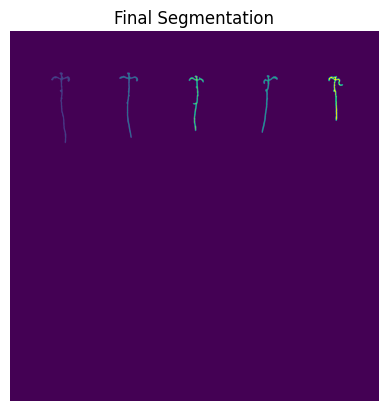

In [13]:
# Step 9: Display final result
num_labels, labels, _, _ = cv2.connectedComponentsWithStats(final_mask)
plt.figure()
plt.title("Final Segmentation")
plt.imshow(labels, cmap="viridis")
plt.axis("off")
plt.show()

# Path to image
process_image("task_3_image_1.png")